# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np
%matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

In [68]:
# Check structure of dataframe
print df.head(10)
print df.info()

   temperature gender  heart_rate
0         99.3      F          68
1         98.4      F          81
2         97.8      M          73
3         99.2      F          66
4         98.0      F          73
5         99.2      M          83
6         98.0      M          71
7         98.8      M          78
8         98.4      F          84
9         98.6      F          86
<class 'pandas.core.frame.DataFrame'>
Int64Index: 130 entries, 0 to 129
Data columns (total 3 columns):
temperature    130 non-null float64
gender         130 non-null object
heart_rate     130 non-null float64
dtypes: float64(2), object(1)
memory usage: 4.1+ KB
None


## (Question 1) Is the distribution of body temperatures normal?

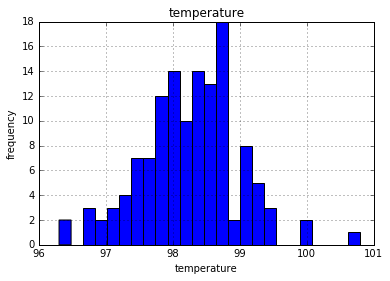

In [69]:
# Plot a histogram of the sampled temperatures
df.hist(column = 'temperature', bins = 25)
plt.xlabel('temperature')
plt.ylabel('frequency')
plt.show()

The distribution looks roughly normal on the histogram.

In [70]:
# Perform a normality test on the data

alpha = 0.05
k2, p = stats.normaltest(df.temperature) # Pearsons' chi-squared test for normality

if p < alpha:  # null hypothesis: temperature is sampled from a normal distribution
    print("We can reject the hypothesis that the measured temperatures are from a normal distribution.")
else:
    print("We cannot reject the hypothesis that the measured temperatures are from a normal distribution.")

We cannot reject the hypothesis that the measured temperatures are from a normal distribution.


It is reasonable to assume that the distribution of body temperatures is normal

## (Question 2) Is the sample size large? Are the observations independent?

In [71]:
# Count the number of observations
print str(len(df.temperature)) + ' observations'

130 observations


Using the n >= 30 rule-of-thumb, yes the sample size is large.
We also know the population of humans is more than 130/0.1=1300, so we can assume the observations are independent.

## (Question 3) Is the true population mean really 98.6 degrees F?

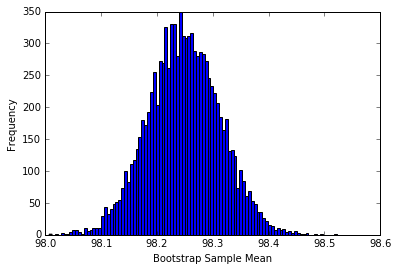

p-value: 0
We can reject the hypothesis that the true mean body temperature is 98.6 degrees F.


In [79]:
np.random.seed(31) # Set a random seed for replicating this test.  This number can be changed

alpha = 0.05 # Set a threshold for rejecting the null hypothesis
n_replicates = 10000
replicates = []

# Collect n_replicates bootstrap samples
for _ in range(n_replicates):
    bs_sample = np.random.choice(df.temperature, len(df.temperature), replace = True)
    replicate = np.mean(bs_sample)
    replicates.append(replicate)

# Plot resulting distribution
plt.hist(replicates, bins = 100)
plt.xlabel('Bootstrap Sample Mean')
plt.ylabel('Frequency')
plt.show()

p = np.sum(replicates >= 98.6)/n_replicates
print 'p-value: ' + str(p)

if p < alpha:  # null hypothesis: true population mean body temperature is 98.6 degrees F
    print("We can reject the hypothesis that the true mean body temperature is 98.6 degrees F.")
else:
    print("We cannot reject the hypothesis that the true mean body temperature is 98.6 degrees F.")

Using bootstrap testing, we find that it is unlikely that the true population mean body temperature is 98.6 F.

We can also try this with frequentist statistical testing.  We would use a one-sample test because we are interested in the mean temperature of the population as a whole.  Because the sample size is large, either z-testing or t-testing would be appropriate in this case, as a z-test is just a t-test in the limit of large sample size.

In [73]:
# Estimate mean and standard error of the sampling distribution.

mean = np.mean(df.temperature)
se = np.std(df.temperature)/len(df.temperature)**0.5
z = (98.6-mean)/se
p = 2*(1-stats.norm.cdf(abs(z)))
print 'p-value: ' + str(p)

if p < alpha:  # null hypothesis: true population mean body temperature is 98.6 degrees F
    print("We can reject the hypothesis that the true mean body temperature is 98.6 degrees F.")
else:
    print("We cannot reject the hypothesis that the true mean body temperature is 98.6 degrees F.")

p-value: 4.35231517493e-08
We can reject the hypothesis that the true mean body temperature is 98.6 degrees F.


A t-test should in theory give approximately the same result as the z-test in the case of large sample size, but the z-test will slightly underestimate the p-value.  We can see that below.

In [74]:
t, p = stats.ttest_1samp(df.temperature, 98.6)
print 'p-value: ' + str(p)
if p < alpha:  # null hypothesis: true population mean body temperature is 98.6 degrees F
    print("We can reject the hypothesis that the true mean body temperature is 98.6 degrees F.")
else:
    print("We cannot reject the hypothesis that the true mean body temperature is 98.6 degrees F.")

p-value: 2.41063204156e-07
We can reject the hypothesis that the true mean body temperature is 98.6 degrees F.


## (Question 4) Draw a small sample of size 10 from the data and repeat both frequentist tests.

In [77]:
np.random.seed(31) # Set a random seed for replicating this selection of the small sample.  This number can be changed

small_sample = np.random.choice(df.temperature, 10, replace = True)

# z-test
# Estimate mean and standard error of the sampling distribution.
mean = np.mean(small_sample)
se = np.std(small_sample)/len(small_sample)**0.5
z = (98.6-mean)/se
p = 2*(1-stats.norm.cdf(abs(z)))
print 'p-value: ' + str(p)

if p < alpha:  # null hypothesis: true population mean body temperature is 98.6 degrees F
    print("We can reject the hypothesis that the true mean body temperature is 98.6 degrees F.")
else:
    print("We cannot reject the hypothesis that the true mean body temperature is 98.6 degrees F.")

p-value: 0.0263677454637
We can reject the hypothesis that the true mean body temperature is 98.6 degrees F.


In [78]:
# t-test
t, p = stats.ttest_1samp(small_sample, 98.6)
print 'p-value: ' + str(p)
if p < alpha:  # null hypothesis: true population mean body temperature is 98.6 degrees F
    print("We can reject the hypothesis that the true mean body temperature is 98.6 degrees F.")
else:
    print("We cannot reject the hypothesis that the true mean body temperature is 98.6 degrees F.")

p-value: 0.0644044957194
We cannot reject the hypothesis that the true mean body temperature is 98.6 degrees F.


In the case of the small sample (n = 10), only the t-test and not the z-test is appropriate to use, as the z-test significantly underestimates the p-value.

## (Question 5) At what temperature should we consider someone's temperature to be "abnormal"?

For this question, we will consider 'abnormal' temperatures to be those outside of a 95% confidence interval.  We will first calculate this interval with bootstrapping.

In [81]:
np.random.seed(31) # Set a random seed for replicating this test.  This number can be changed

c_interval_p = [2.5, 97.5]
n_replicates = 10000
replicates = []

# Collect n_replicates bootstrap samples
for _ in range(n_replicates):
    bs_sample = np.random.choice(df.temperature, len(df.temperature), replace = True)
    replicate = np.mean(bs_sample)
    replicates.append(replicate)

c_interval = np.percentile(replicates, c_interval_p)
print 'Temperatures lower than '+str(c_interval[0])+' and higher than '+str(c_interval[1])+' are abnormal.'

Temperatures lower than 98.1230576923 and higher than 98.3753846154 are abnormal.


We can also calculate this interval with a frequentist approach.  We will use z-scores to calculate this inverval, as the sample size is large.

In [83]:
# Estimate mean and standard error of the sampling distribution.
mean = np.mean(df.temperature)
se = np.std(df.temperature)/len(df.temperature)**0.5

# Calculate the confidence interval.
c_interval = stats.norm.interval(0.95, loc=mean, scale=se)

print 'Temperatures lower than '+str(c_interval[0])+' and higher than '+str(c_interval[1])+' are abnormal.'

Temperatures lower than 98.1236821115 and higher than 98.374779427 are abnormal.


## (Question 6) Is there a significant difference between males and females in normal temperature?

In [86]:
# First determine how many of each gender.

df.groupby('gender').count()

,temperature,heart_rate
gender,,
F,65,65
M,65,65


There are equal numbers of males and female in the sample, so we can assume equal variances to simplify the calculation.

In [97]:
alpha = 0.05

m_temps = df[df.gender == 'M'].temperature
f_temps = df[df.gender == 'F'].temperature
print 'The mean temperature for males is '+str(np.mean(m_temps))+' F.'
print 'The mean temperature for females is '+str(np.mean(f_temps))+' F.'

t, p = stats.ttest_ind(m_temps, f_temps)

if p < alpha:  # null hypothesis: males and females have the same mean body temperature
    print("We can reject the hypothesis that males and females have the same mean body temperature.")
else:
    print("We cannot reject the hypothesis that males and females have the same mean body temperature.")

The mean temperature for males is 98.1046153846 F.
The mean temperature for females is 98.3938461538 F.
We can reject the hypothesis that males and females have the same mean body temperature.


While it is believed that the average human body temperature is 98.6 degrees F, we have strong evidence that that this widely-accepted number is not representative of the true mean human body temperature based on temperatures taken from a random sample of 65 males and 65 females.  Additionally, we can reasonably conclude that the mean body temperatures for males and female are also not equal.